##  <center>  CSI 6160 Term Paper </center> 
#### <center> Fakhare Alam- fakharealam@oakland.edu</center>
#### <center> Tarun Gudela- tgudela@oakland.edu</center>

### STEP-1 Import all necessary Library

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,make_scorer,precision_score,recall_score,roc_auc_score,f1_score
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


### STEP-2  Load the raw file

In [2]:
df_raw=pd.read_csv('finalMerge.csv')

#### Separate the columns ,features and class label

In [3]:
column_list=df_raw.columns[3:]
df_raw=df_raw[column_list]
feature_names=df_raw.columns[4:]
class_label=df_raw.columns[0]

In [4]:
df_raw.head()

,type,zcr-0,zcr-1,energy-0,energy-1,energy_entropy-0,energy_entropy-1,spectral_centroid-0,spectral_centroid-1,spectral_spread-0,...,chroma_4-12,chroma_5-12,chroma_6-12,chroma_7-12,chroma_8-12,chroma_9-12,chroma_10-12,chroma_11-12,chroma_12-12,chroma_std-12
0,bonafide,0.014250,0.022521,1.080482e-07,0.038364,3.019508,2.680155,0.103639,0.039601,0.199317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bonafide,0.013479,0.038917,9.289566e-08,0.029430,3.143045,1.781641,0.128821,0.044023,0.219450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bonafide,0.018125,0.048605,2.660120e-07,0.026271,2.451368,1.540816,0.070391,0.051182,0.133377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bonafide,0.014646,0.077897,1.304738e-06,0.012519,1.520691,2.401172,0.071749,0.075738,0.133914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bonafide,0.022959,0.045418,7.527711e-07,0.015287,2.836484,1.874733,0.064861,0.060937,0.118360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Parse the class label to get correct label

In [5]:
# Some lables contains _ with file name
df_raw[class_label]=df_raw[class_label].apply(lambda x:x.split('_')[1] if x.find('_') != -1 else x)

### SETP-3 Visulization and Exploratory Data Analysis (EDA)

#### Sample Dataset

In [6]:
df_raw.head(10)

,type,zcr-0,zcr-1,energy-0,energy-1,energy_entropy-0,energy_entropy-1,spectral_centroid-0,spectral_centroid-1,spectral_spread-0,...,chroma_4-12,chroma_5-12,chroma_6-12,chroma_7-12,chroma_8-12,chroma_9-12,chroma_10-12,chroma_11-12,chroma_12-12,chroma_std-12
0,bonafide,0.014250,0.022521,1.080482e-07,0.038364,3.019508,2.680155,0.103639,0.039601,0.199317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bonafide,0.013479,0.038917,9.289566e-08,0.029430,3.143045,1.781641,0.128821,0.044023,0.219450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bonafide,0.018125,0.048605,2.660120e-07,0.026271,2.451368,1.540816,0.070391,0.051182,0.133377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bonafide,0.014646,0.077897,1.304738e-06,0.012519,1.520691,2.401172,0.071749,0.075738,0.133914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bonafide,0.022959,0.045418,7.527711e-07,0.015287,2.836484,1.874733,0.064861,0.060937,0.118360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,bonafide,0.014292,0.024834,2.165845e-07,0.005297,2.282168,1.508697,0.070807,0.047016,0.153500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,bonafide,0.014771,0.020230,2.364334e-07,0.010645,2.584020,2.365309,0.073804,0.034671,0.151185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,bonafide,0.013229,0.035688,1.226951e-07,0.016139,3.112370,1.678166,0.121470,0.049242,0.218387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,bonafide,0.011959,0.029626,1.252329e-07,0.058600,3.026382,2.294965,0.088493,0.045491,0.180672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,bonafide,0.016042,0.023042,4.332866e-07,0.021943,2.275002,2.719562,0.067027,0.044708,0.128047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### <u>A. Verify Dataset imbalance</u>

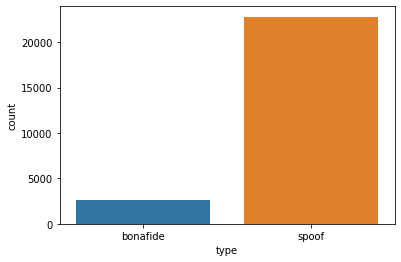

In [7]:
sns.countplot(df_raw[class_label])

In [39]:
df_raw[class_label].value_counts()

spoof       22800
bonafide     2580
Name: type, dtype: int64

##### Dataset is highly imbalance , there is a need to balance the dataset w.r.t to class label so that machine learning model is not bisased.

#### <u>B. Check feature name and dimension of dataset</u>

In [8]:
print('Features names -\n',feature_names)
print('\n')
print('Dimension of the Dataset\n',df_raw.shape)


Features names -
 Index(['energy-1', 'energy_entropy-0', 'energy_entropy-1',
       'spectral_centroid-0', 'spectral_centroid-1', 'spectral_spread-0',
       'spectral_spread-1', 'spectral_entropy-0', 'spectral_entropy-1',
       'spectral_flux-0',
       ...
       'chroma_4-12', 'chroma_5-12', 'chroma_6-12', 'chroma_7-12',
       'chroma_8-12', 'chroma_9-12', 'chroma_10-12', 'chroma_11-12',
       'chroma_12-12', 'chroma_std-12'],
      dtype='object', length=439)


Dimension of the Dataset
 (25380, 443)


#### <u>C. Step-2 Check feature type information</u>

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25380 entries, 0 to 25379
Columns: 443 entries, type to chroma_std-12
dtypes: float64(442), object(1)
memory usage: 85.8+ MB


#### <u> D. Check NULL values</u> 


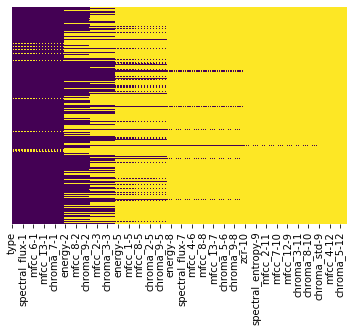

In [10]:
sns.heatmap(df_raw.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### <u> E. Drop column which have null values more than 60% <\u>

In [11]:
df_raw.dropna(thresh=df_raw.shape[0]*0.6,how='all',axis=1,inplace=True)

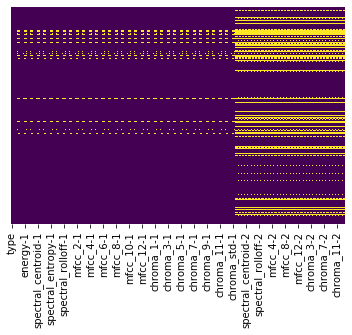

In [12]:
sns.heatmap(df_raw.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Balance the Data

In [13]:
no_bonafide= len(df_raw[df_raw['type'] == 'bonafide'])
spoof_indices = df_raw[df_raw['type'] == 'spoof'].index
random_indices = np.random.choice(spoof_indices,no_bonafide,replace=False)
bonafide_indices = df_raw[df_raw['type'] == 'bonafide'].index
under_sample_indices = np.concatenate([bonafide_indices,random_indices])
df_raw_balanced = df_raw.loc[under_sample_indices]

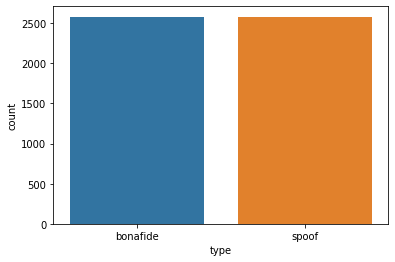

In [14]:
sns.countplot(df_raw_balanced[class_label])

#### <u> F. Check Basic Statistics</u>

In [15]:
df_raw_balanced.describe()

,zcr-0,zcr-1,energy-0,energy-1,energy_entropy-0,energy_entropy-1,spectral_centroid-0,spectral_centroid-1,spectral_spread-0,spectral_spread-1,...,chroma_4-2,chroma_5-2,chroma_6-2,chroma_7-2,chroma_8-2,chroma_9-2,chroma_10-2,chroma_11-2,chroma_12-2,chroma_std-2
count,5160.000000,5051.000000,5.160000e+03,5.051000e+03,5160.000000,5051.000000,5160.000000,5051.000000,5160.000000,5051.000000,...,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000
mean,0.014254,0.023775,5.144166e-03,2.537421e-02,2.646714,2.392888,0.061526,0.046798,0.122287,0.082210,...,0.004646,0.004069,0.003861,0.005291,0.009304,0.013684,0.013854,0.014809,0.012828,0.014545
std,0.008352,0.011923,1.226396e-02,1.932035e-02,0.782803,0.608552,0.020708,0.016132,0.043293,0.032623,...,0.009907,0.008801,0.009187,0.012463,0.025531,0.027434,0.023884,0.029284,0.023235,0.012183
min,0.003292,0.002583,4.296853e-08,4.432488e-08,0.002191,0.003926,0.012715,0.012503,0.034090,0.033609,...,0.000015,0.000009,0.000010,0.000006,0.000007,0.000018,0.000030,0.000027,0.000026,0.000088
25%,0.009000,0.014396,1.007592e-06,1.115845e-02,2.331378,2.124641,0.047663,0.035218,0.089927,0.057043,...,0.000599,0.000510,0.000525,0.000624,0.000766,0.001218,0.001491,0.001632,0.001519,0.006624
50%,0.012146,0.021500,3.041573e-06,2.269008e-02,3.049134,2.521240,0.060501,0.044236,0.125508,0.075636,...,0.001502,0.001349,0.001286,0.001580,0.002217,0.003666,0.004678,0.004854,0.004225,0.011110
75%,0.016381,0.031396,2.004400e-04,3.585701e-02,3.193754,2.813339,0.073032,0.055351,0.153103,0.100314,...,0.004136,0.003603,0.003324,0.004325,0.006652,0.012315,0.015177,0.014347,0.012971,0.018469
max,0.092648,0.077897,9.759232e-02,1.312768e-01,3.317134,3.310154,0.340087,0.230984,0.301256,0.298466,...,0.186853,0.159662,0.123041,0.184157,0.546402,0.363533,0.222601,0.412208,0.303294,0.148767


In [16]:
df_raw_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5160 entries, 0 to 21062
Columns: 103 entries, type to chroma_std-2
dtypes: float64(102), object(1)
memory usage: 4.3+ MB


In [17]:
df_raw_balanced.describe().loc['std']

zcr-0               0.008352
zcr-1               0.011923
energy-0            0.012264
energy-1            0.019320
energy_entropy-0    0.782803
                      ...   
chroma_9-2          0.027434
chroma_10-2         0.023884
chroma_11-2         0.029284
chroma_12-2         0.023235
chroma_std-2        0.012183
Name: std, Length: 102, dtype: float64

##### There is huge difference in variances of each variables and a variable with a high variance will have a higher weight for the calculation of axis than a variable with a low standard.It is necessary to normalize the attributes 

### STEP-4 Data preprocessing

#### <u>A. Divide Data into Train and Test</u>

In [18]:
feature_names=df_raw_balanced.columns[1:]
class_label=df_raw_balanced.columns[0]

In [19]:
df_raw_balanced.fillna(df_raw.mean(),inplace=True)

In [20]:
df_raw_balanced.columns

Index(['type', 'zcr-0', 'zcr-1', 'energy-0', 'energy-1', 'energy_entropy-0',
       'energy_entropy-1', 'spectral_centroid-0', 'spectral_centroid-1',
       'spectral_spread-0',
       ...
       'chroma_4-2', 'chroma_5-2', 'chroma_6-2', 'chroma_7-2', 'chroma_8-2',
       'chroma_9-2', 'chroma_10-2', 'chroma_11-2', 'chroma_12-2',
       'chroma_std-2'],
      dtype='object', length=103)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_raw_balanced[feature_names], 
                                                    df_raw_balanced[class_label], test_size=0.20, 
                                                    random_state=101)

### Standardize- 

In [22]:
# Create the Scaler object
scaler = StandardScaler()
# Fit data on the scaler object
scaled_X_train = scaler.fit_transform(X_train)
scaled_df_X_train = pd.DataFrame(scaled_X_train, columns=feature_names)
#scaled_df_X_train

In [23]:
scaled_X_test =scaler.transform(X_test)
scaled_df_X_test= pd.DataFrame(data=scaled_X_test,columns=feature_names)

### PCA

In [24]:
pca=decomposition.PCA(n_components=30)
pca_scaled_X_train=pca.fit_transform(scaled_X_train)
pca_scaled_X_train_df=pd.DataFrame(data=pca_scaled_X_train)
#Y3_df


In [25]:
pca_scaled_X_test=pca.transform(scaled_X_test)
pca_scaled_X_test_df=pd.DataFrame(data=pca_scaled_X_test)

In [26]:
print('Eigen Values',pca.explained_variance_)
print('\n')
print('Eigen Vectors',pca.components_)
print('\n')
print('Explained Variance Ratio',pca.explained_variance_ratio_)
print('\n')

Eigen Values [8.40869191 6.07185672 4.30503332 4.14685418 3.3837807  2.93781885
 2.84718323 2.63433086 2.2550382  2.14291554 2.08390039 1.88453652
 1.81372698 1.67142197 1.59286865 1.46179984 1.40525243 1.3737211
 1.34529763 1.31890573 1.26036267 1.20379226 1.16866544 1.13350889
 1.07905725 1.06106961 1.0431586  1.00677918 0.99376471 0.96314055]


Eigen Vectors [[ 0.1953104   0.05227928  0.19504619 ...  0.01557217  0.01619435
   0.00700151]
 [ 0.03564452 -0.1093364   0.10051653 ...  0.09022193  0.0174732
   0.15959812]
 [ 0.06522845  0.06902199  0.04638177 ... -0.0862178  -0.05034199
  -0.15002385]
 ...
 [ 0.18691318  0.03502745  0.04405981 ... -0.01199466 -0.15317537
   0.03366513]
 [ 0.17877374 -0.06857014  0.10296901 ... -0.07782978  0.07665748
  -0.0379233 ]
 [-0.07844998  0.07822587 -0.00044626 ... -0.17744378  0.1713076
  -0.01214736]]


Explained Variance Ratio [0.08323421 0.06010283 0.04261377 0.04104802 0.03349466 0.02908027
 0.0281831  0.02607617 0.0223217  0.02121185 0.02062

In [27]:
pca_variance=pca.explained_variance_ratio_*100
np.sum(pca_variance)

65.32895638136748

Text(0.5, 1.0, 'Explained Variance')

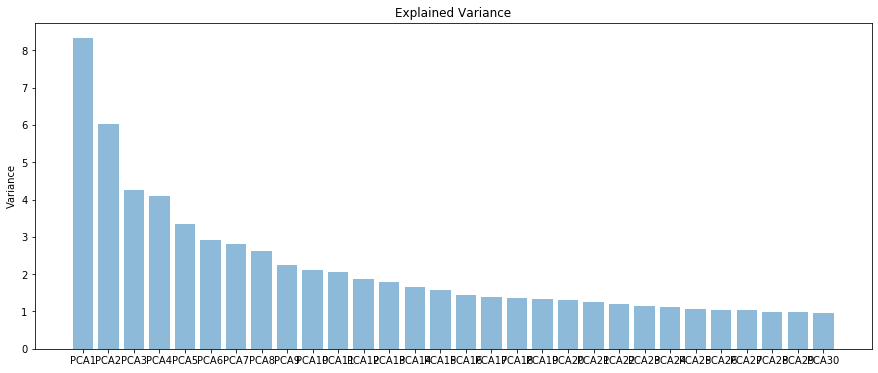

In [28]:
plt.figure(figsize=(15,6))

objects = ('PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6','PCA7', 'PCA8',
           'PCA9', 'PCA10', 'PCA11', 'PCA12','PCA13', 'PCA14', 'PCA15' ,
          'PCA16', 'PCA17', 'PCA18', 'PCA19','PCA20', 'PCA21', 'PCA22',
          'PCA23', 'PCA24', 'PCA25', 'PCA26','PCA27', 'PCA28', 'PCA29','PCA30')
y_pos = np.arange(len(objects))
performance = pca_variance

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Variance')
plt.title('Explained Variance')

### STEP-5 Model Building

In [41]:
def K_fold_cross_validation(model,X,Y,kfold=7):
    '''
    @ Author - Fakhare Alam 
    '''
    scores_list=(cross_val_score(model, X, Y, cv=kfold))
    mean_score=np.mean(scores_list)
    std_score=np.std(scores_list)
    return scores_list,mean_score,std_score

#### <u>A. Logistic Regression</u>

In [44]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(pca_scaled_X_train, y_train)

y_pred = logreg.predict(pca_scaled_X_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
cls_report=classification_report(y_test,y_pred)
accr=accuracy_score(y_test,y_pred)
tn, fp, fn, tp = cnf_matrix.ravel()
scores_list,mean_score,std_score=K_fold_cross_validation(logreg,pca_scaled_X_train, y_train,kfold=7)
print('\033[1m'+'Logistic Regression')
print('\033[0m')
print("Accuracy {}\n\nConfusionMatrix\n{}\n\n(tn, fp, fn, tp)\
          ({}, {}, {}, {})\n\nClassification_Report\n{}\n 7-Fold Score {}\nMean_Score {}\nStd_score {}"
          .format(accr,cnf_matrix,tn, fp, fn, tp,cls_report,scores_list, mean_score, std_score))     


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Logistic Regression

Accuracy 0.8963178294573644

ConfusionMatrix
[[485  37]
 [ 70 440]]

(tn, fp, fn, tp)          (485, 37, 70, 440)

Classification_Report
              precision    recall  f1-score   support

    bonafide       0.87      0.93      0.90       522
       spoof       0.92      0.86      0.89       510

    accuracy                           0.90      1032
   macro avg       0.90      0.90      0.90      1032
weighted avg       0.90      0.90      0.90      1032

 7-Fold Score [0.90169492 0.85762712 0.88135593 0.87118644 0.87627119 0.87436333
 0.87606112]
Mean_Score 0.876937148776808
Std_score 0.012225594006343354


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### <u>B. AdaBoost</u>

In [50]:
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(pca_scaled_X_train, y_train)
y_pred = adaboost.predict(pca_scaled_X_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
cls_report=classification_report(y_test,y_pred)
accr=accuracy_score(y_test,y_pred)
tn, fp, fn, tp = cnf_matrix.ravel()
scores_list,mean_score,std_score=K_fold_cross_validation(adaboost,pca_scaled_X_train, y_train,kfold=7)
print('\033[1m'+'Adaptive Boosting')
print('\033[0m')
print("Accuracy {}\n\nConfusionMatrix\n{}\n\n(tn, fp, fn, tp)\
          ({}, {}, {}, {})\n\nClassification_Report\n{}\n 7-Fold Score {}\nMean_Score {}\nStd_score {}"
          .format(accr,cnf_matrix,tn, fp, fn, tp,cls_report,scores_list, mean_score, std_score))  

Adaptive Boosting

Accuracy 0.874031007751938

ConfusionMatrix
[[477  45]
 [ 85 425]]

(tn, fp, fn, tp)          (477, 45, 85, 425)

Classification_Report
              precision    recall  f1-score   support

    bonafide       0.85      0.91      0.88       522
       spoof       0.90      0.83      0.87       510

    accuracy                           0.87      1032
   macro avg       0.88      0.87      0.87      1032
weighted avg       0.88      0.87      0.87      1032

 7-Fold Score [0.86271186 0.87118644 0.86101695 0.84237288 0.87288136 0.86587436
 0.86587436]
Mean_Score 0.8631311740258246
Std_score 0.00933928740839683


#### <u> SVM</u>

In [51]:
svc = svm.SVC(C=1.0, kernel='rbf')
svc.fit(pca_scaled_X_train, y_train)
y_pred = svc.predict(pca_scaled_X_test)
cnf_matrix=confusion_matrix(y_test,y_pred)
cls_report=classification_report(y_test,y_pred)
accr=accuracy_score(y_test,y_pred)
tn, fp, fn, tp = cnf_matrix.ravel()
scores_list,mean_score,std_score=K_fold_cross_validation(svc,pca_scaled_X_train, y_train,kfold=7)
print('\033[1m'+'Supportive Vector Machine')
print('\033[0m')
print("Accuracy {}\n\nConfusionMatrix\n{}\n\n(tn, fp, fn, tp)\
          ({}, {}, {}, {})\n\nClassification_Report\n{}\n 7-Fold Score {}\nMean_Score {}\nStd_score {}"
          .format(accr,cnf_matrix,tn, fp, fn, tp,cls_report,scores_list, mean_score, std_score)) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Supportive Vector Machine

Accuracy 0.9457364341085271

ConfusionMatrix
[[503  19]
 [ 37 473]]

(tn, fp, fn, tp)          (503, 19, 37, 473)

Classification_Report
              precision    recall  f1-score   support

    bonafide       0.93      0.96      0.95       522
       spoof       0.96      0.93      0.94       510

    accuracy                           0.95      1032
   macro avg       0.95      0.95      0.95      1032
weighted avg       0.95      0.95      0.95      1032

 7-Fold Score [0.93728814 0.91864407 0.92881356 0.92542373 0.94915254 0.92359932
 0.92020374]
Mean_Score 0.9290178699893528
Std_score 0.010010190081049008


#### <u>KNN</u>

In [52]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(pca_scaled_X_train, y_train)
y_pred = knn.predict(pca_scaled_X_test)
cnf_matrix=confusion_matrix(y_test,y_pred)
cls_report=classification_report(y_test,y_pred)
accr=accuracy_score(y_test,y_pred)
tn, fp, fn, tp = cnf_matrix.ravel()
scores_list,mean_score,std_score=K_fold_cross_validation(knn,pca_scaled_X_train, y_train,kfold=7)
print('\033[1m'+'KNN')
print('\033[0m')
print("Accuracy {}\n\nConfusionMatrix\n{}\n\n(tn, fp, fn, tp)\
          ({}, {}, {}, {})\n\nClassification_Report\n{}\n 7-Fold Score {}\nMean_Score {}\nStd_score {}"
          .format(accr,cnf_matrix,tn, fp, fn, tp,cls_report,scores_list, mean_score, std_score)) 

KNN

Accuracy 0.9195736434108527

ConfusionMatrix
[[504  18]
 [ 65 445]]

(tn, fp, fn, tp)          (504, 18, 65, 445)

Classification_Report
              precision    recall  f1-score   support

    bonafide       0.89      0.97      0.92       522
       spoof       0.96      0.87      0.91       510

    accuracy                           0.92      1032
   macro avg       0.92      0.92      0.92      1032
weighted avg       0.92      0.92      0.92      1032

 7-Fold Score [0.90677966 0.89152542 0.90847458 0.89661017 0.94237288 0.90662139
 0.87775891]
Mean_Score 0.904306145352446
Std_score 0.018536686663741208


#### <u> ANN</u>

In [53]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 70, 30,20,10), max_iter=1000)

mlp.fit(pca_scaled_X_train, y_train)
y_pred = mlp.predict(pca_scaled_X_test)
cnf_matrix=confusion_matrix(y_test,y_pred)
cls_report=classification_report(y_test,y_pred)
accr=accuracy_score(y_test,y_pred)
tn, fp, fn, tp = cnf_matrix.ravel()
scores_list,mean_score,std_score=K_fold_cross_validation(mlp,pca_scaled_X_train, y_train,kfold=7)
print('\033[1m'+'Articificial Neural Netwrok')
print('\033[0m')
print("Accuracy {}\n\nConfusionMatrix\n{}\n\n(tn, fp, fn, tp)\
          ({}, {}, {}, {})\n\nClassification_Report\n{}\n 7-Fold Score {}\nMean_Score {}\nStd_score {}"
          .format(accr,cnf_matrix,tn, fp, fn, tp,cls_report,scores_list, mean_score, std_score))  


Articificial Neural Netwrok

Accuracy 0.9418604651162791

ConfusionMatrix
[[499  23]
 [ 37 473]]

(tn, fp, fn, tp)          (499, 23, 37, 473)

Classification_Report
              precision    recall  f1-score   support

    bonafide       0.93      0.96      0.94       522
       spoof       0.95      0.93      0.94       510

    accuracy                           0.94      1032
   macro avg       0.94      0.94      0.94      1032
weighted avg       0.94      0.94      0.94      1032

 7-Fold Score [0.92372881 0.91864407 0.91694915 0.88644068 0.93050847 0.91850594
 0.91850594]
Mean_Score 0.9161832958558234
Std_score 0.012896290770754264


#### <u> Ensemble Model- Voting Classifier</u>

In [54]:
eclf= VotingClassifier(estimators=[
         ('logreg', logreg),('adaboost', adaboost),
          ('svc', svc),('mlp', mlp),('knn', knn)],
        voting='hard')

eclf = eclf.fit(pca_scaled_X_train, y_train)

y_pred=eclf.predict(pca_scaled_X_test)
cnf_matrix=confusion_matrix(y_test,y_pred)
cls_report=classification_report(y_test,y_pred)
accr=accuracy_score(y_test,y_pred)
tn, fp, fn, tp = cnf_matrix.ravel()
scores_list,mean_score,std_score=K_fold_cross_validation(eclf,pca_scaled_X_train, y_train,kfold=7)
print('\033[1m'+'Ensemble Model')
print('\033[0m')
print("Accuracy {}\n\nConfusionMatrix\n{}\n\n(tn, fp, fn, tp)\
          ({}, {}, {}, {})\n\nClassification_Report\n{}\n 7-Fold Score {}\nMean_Score {}\nStd_score {}"
          .format(accr,cnf_matrix,tn, fp, fn, tp,cls_report,scores_list, mean_score, std_score)) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

Ensemble Model

Accuracy 0.937984496124031

ConfusionMatrix
[[505  17]
 [ 47 463]]

(tn, fp, fn, tp)          (505, 17, 47, 463)

Classification_Report
              precision    recall  f1-score   support

    bonafide       0.91      0.97      0.94       522
       spoof       0.96      0.91      0.94       510

    accuracy                           0.94      1032
   macro avg       0.94      0.94      0.94      1032
weighted avg       0.94      0.94      0.94      1032

 7-Fold Score [0.92881356 0.91864407 0.92033898 0.91016949 0.94576271 0.92359932
 0.91001698]
Mean_Score 0.9224778731958381
Std_score 0.011399407005382188
